## Demo notebook for pandas backtesting code
Here we are going to demonstrate how to use the pandas based backtesting framework included in this project. This is a vectorized backtesting engine with support for an optional loop based backtester. It uses ***quantstats*** python module to generate tearsheets. It also supports functions for dumping all signals generated during the backtest (either via the indicators or the strategies).

Due to it's completely vectorized nature, it is very very fast. Right now, to keep it simple we haven't added any portfolio level backtesting. That can be done by another backtesting framework which is included in this project and is based on ***backtrader*** [https://www.backtrader.com] project.

Apparently, ***backtrader*** is very slow when analysing lots of data due to it's being event based. This is the reason I developed this pandas based project. It's fun to develop and completely satisfies my needs at this time. Contributions are welcome !!

In [1]:
import sys
sys.path.append('../')

%matplotlib notebook
import matplotlib.pyplot as plt
from backtesting.pandas.core.backtest import *

**Load demo 15m data**

In [3]:
df = pd.read_csv('data/Nifty_50_Index_15m.csv', index_col=0)
df

,c,o,h,l,v
d,,,,,
2015-01-09 09:15:00,8294.15,8285.45,8303.00,8285.45,0
2015-01-09 09:30:00,8285.55,8294.10,8295.75,8277.40,0
2015-01-09 09:45:00,8282.00,8285.40,8287.65,8273.95,0
2015-01-09 10:00:00,8281.55,8281.80,8287.35,8274.95,0
2015-01-09 10:15:00,8290.45,8281.50,8291.10,8277.95,0
...,...,...,...,...,...
2019-08-02 14:15:00,11047.45,11050.65,11079.80,11021.15,0
2019-08-02 14:30:00,11015.45,11047.65,11049.40,11005.15,0
2019-08-02 14:45:00,10985.95,11015.45,11019.60,10968.40,0


###### Run the backtest

In [6]:
results = backtest_single('supertrend_crossover',
                          strat_params={'atr_period': 5, 'atr_multiplier': 10},
                          prices=df, columns='cohlv', slippage='0.02%')

>> Preparing price data.
>> Assumed columns="['c', 'o', 'h', 'l', 'v']", CSV columns="['c', 'o', 'h', 'l', 'v']". Please change if not applicable !!
>> Running strategy "supertrend_crossover" on price data.
>> PARAMS = {'atr_period': 5, 'atr_multiplier': 10}
>> INFO:: Using default value of "ema_length"=None
>> INFO:: Using default value of "atr_max"=None
>> INFO:: Using default value of "price_key"=close
>> Using signal mask ('Buy', 'Sell', 'Sell', 'Buy').
>> Using slippage 0.02%


**Now, we can analyse the results**

In [7]:
results

{'returns': d
 2015-01-09 09:15:00         NaN
 2015-01-09 09:30:00   -0.000000
 2015-01-09 09:45:00   -0.000000
 2015-01-09 10:00:00   -0.000000
 2015-01-09 10:15:00    0.000000
                          ...   
 2019-08-02 14:15:00    0.000294
 2019-08-02 14:30:00    0.002901
 2019-08-02 14:45:00    0.002682
 2019-08-02 15:00:00   -0.002150
 2019-08-02 15:15:00    0.000841
 Length: 28140, dtype: float64, 'positions': d
 2015-01-09 09:15:00    0
 2015-01-09 09:30:00    0
 2015-01-09 09:45:00    0
 2015-01-09 10:00:00    0
 2015-01-09 10:15:00    0
                       ..
 2019-08-02 14:15:00   -1
 2019-08-02 14:30:00   -1
 2019-08-02 14:45:00   -1
 2019-08-02 15:00:00   -1
 2019-08-02 15:15:00   -1
 Length: 28140, dtype: int64, 'signals':                        Buy   Sell     0_strend   0_price
 d                                                       
 2015-01-09 09:15:00  False  False          NaN   8294.15
 2015-01-09 09:30:00  False  False          NaN   8285.55
 2015-01-09 09:45:

**Plotting all signals**

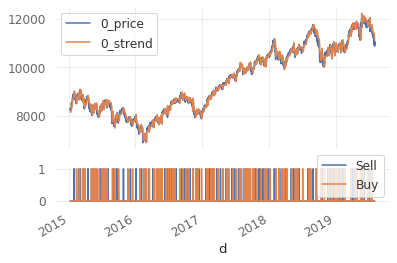

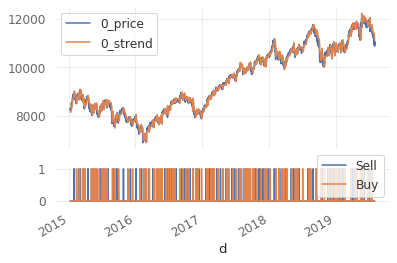

In [8]:
plot_signals(results['signals'])

**Generate tearsheet**

In [10]:
generate_tearsheet(rets=results['returns'], out_file='data/demo_tearsheet.html')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [11]:
from IPython.core.display import display, HTML
display(HTML(open('data/demo_tearsheet.html', 'r').read()))